# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучите общую информацию. 

#### Импортируем библиотеки и изучаем общую информацию.

In [1]:
import pandas as pd # импортируем бибилиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # Читаем файл csv

pd.set_option('display.max_columns', None) # выводим все колонки на экран
import warnings
warnings.simplefilter("ignore")

display(data.head(10)) # первые сьтроки датасета
display(data.tail()) # последние сьтроки датасета

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.info() # основная информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
display(data.describe()) # общие показатели

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
data.isna().sum().sort_values(ascending=False) # кол-во пропусков по столбцам

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [5]:
#процент пропусков от всего датасета
display(data.isna().mean().sort_values(ascending=False)*100)

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

Доработать: добавить визуализацию кол-ва пропусков по столбцам.

Больше половины столбцов датасета имеют пропуски которые достигают 88% и их предстоит изучить.

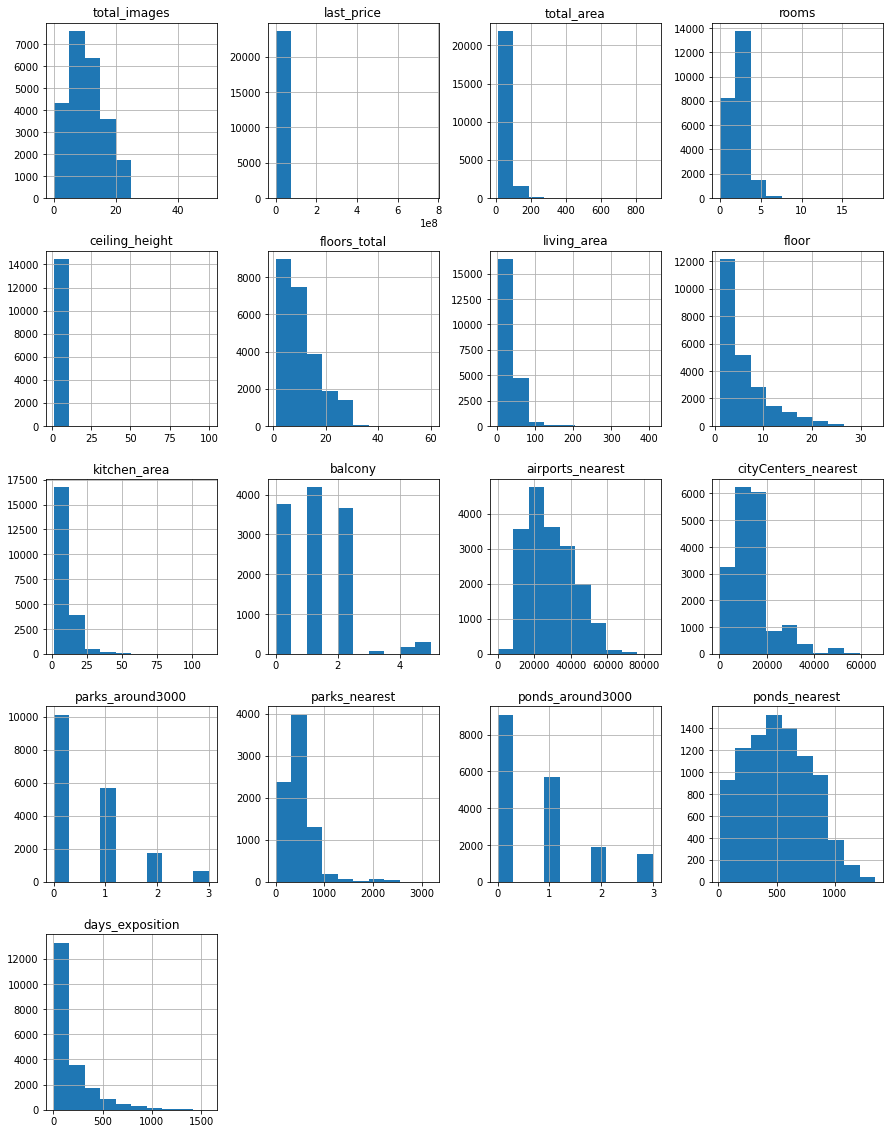

In [6]:
data.hist(figsize=(15, 20)); # гистограммы количественных переменных

#### Строим матрицу корреляции, зависимости из которой будут использовать при дальнейшем исследовании.

In [7]:
corr_data = data.corr() # формируем матрицу корреляции
corr_data.style.background_gradient(cmap='coolwarm') # применяем расцветку ячеек

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,nan,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,nan,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


In [8]:
data.duplicated().sum() #явные дубликаты

0

Обнаружены пропуски в датасете, количество некоторых достигает 88%. Количество столбцов с пропусками 14 (всего в датасете 22 столбца). Имеется не верный тип данных столбца 'first_day_exposition' т.к. должен являться датой. Отсутствуют явные дубликаты.

### Предобработка данных

#### Удаление и заполнение пропусков. Изменение типа данных.

In [9]:
# приведем к нижнему регистру столбец cityCenters_nearest
data = data.rename(columns={'cityCenters_nearest':'citycenters_nearest'})

Заполняем пропущенные значения в столбцах датасета с наибольшим процентом пропусков и определяем их природу.

Столбец "is_apartment" имеют неправильный тип данных, должен содержать значения типа bool, что следует из описания проекта. Замену осуществляем на False, так как при отсутствии апартаментов не заполнена эта позиция в объявлении и скорее апартаментами объект не является.

In [10]:
# замену пропущеных значений осуществляем на False 
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype('bool') #  меняем тип данных
data['is_apartment'].value_counts() # смотрим кол-во значений столбца

False    23649
True        50
Name: is_apartment, dtype: int64

 Столбец "first_day_exposition" необходимо преобразовать в тип datetime, так как данные указаны до дней, то сохраним в датасете дни.

In [11]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S' # преобразуем
)
display(data['first_day_exposition'].head()) # проверяем

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

У значений столбцов ponds_around3000 и parks_around3000 одинаковое кол-во пропусков. При этом минимальное значение согласно метода describe() равно 0.
Логично предположить, что у пропущенных значений не указано кол-во парков и прудов поблизости в связи с их отсутствием. Однако согласно матрице корреляции, значения корреляции относительно скорости продажи и ценой не превышают 0,15. Пропуски оставляем без изменений.

In [12]:
data[['ponds_around3000', 'parks_around3000']].describe() # основные показатели выбранных столбцов

,ponds_around3000,parks_around3000
count,18181.000000,18181.000000
mean,0.770255,0.611408
std,0.938346,0.802074
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,3.000000,3.000000


Аналогично в столбцах airports_nearest и parks_nearest, airports_nearest в которых % пропусков достигает 65. Удаление их из анализа может повредить выборку данных и чистоту исследования. Заполнение пропусков медианой или средним не возможно обосновать. Пропуски не критичны.

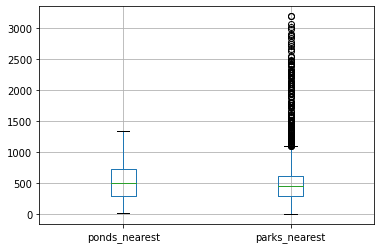

In [13]:
data.boxplot(column=['ponds_nearest', 'parks_nearest']); 

Значения в пределах 3000м, за исключением единичных значений парков.

Исследуем столбец высоты потолков, у которого пропуски составляют 38%.
Согласно метода describe() имеются аномальные min и max.
Построим гистограмму.

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

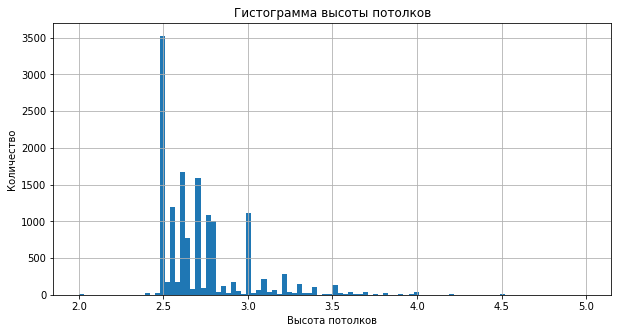

In [14]:
data['ceiling_height'].sort_values().plot( # строим гистограмму
    y='ceiling_height', 
    kind='hist', 
    bins=100, 
    range=(2,5),
    figsize = (10,5),
    grid=True);
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество')

display(data['ceiling_height'].describe()) # смотрим на данные столбца


Имеются значения превышающие 4 и ниже 1,8 метра. Данные значения признаем как аномальные и посчитаем их количество.

In [15]:
display(len(data[data['ceiling_height'] > 4].sort_values('ceiling_height'))) # потолки выше 4 м.

75

In [16]:
display(data.loc[(data['ceiling_height'] < 1.8, 'ceiling_height')].count()) # потолки ниже 1.8 м.

3

Заменим в датасете значения высот которые могут быть связаны с неверным указанием разделительной точки и делим на 10. Таких значений не много, но зато мы сохраним полноту датасета.


In [17]:
data.loc[(data['ceiling_height'] > 23.9, 'ceiling_height')] = \
   data['ceiling_height'] / 10

Присваиваем аномально высоким значениям, медианное.

In [18]:
data.loc[(data['ceiling_height'] > 4, 'ceiling_height')] = data['ceiling_height'].median()
display(len(data[data['ceiling_height'] > 4])) # Проверяем оставшиеся аномальные высокие значения

0

In [19]:
# Проверяем аномально низкие значения
display(data.loc[(data['ceiling_height'] < 1.8, 'ceiling_height')].count())

3

Присваиваем аномально низким значениям, медианное. Проверяем

In [20]:
data.loc[(data['ceiling_height'] < 1.8, 'ceiling_height')] = data['ceiling_height'].median()
display(data.loc[(data['ceiling_height'] < 1.8, 'ceiling_height')].count())

0

Пропущенные значения высоты потолков составляют почти половина столбца.

In [21]:
data['ceiling_height'].isna().sum() # пропуски

9195

Количество пропусков высоты потолков достигает почти половина столбца. Дабы избежать выбросы и аномальные значения оставляем их.

In [22]:
# проверяем значения столбца
data['ceiling_height'].describe()

count    14504.000000
mean         2.720637
std          0.257597
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

Осуществлена замена пропусков в колонке "ceiling_height" на медианные значения, и проведена пред обработка аномалий.

Выводим сведения о комнатах.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

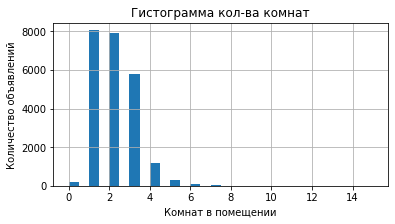

In [23]:
display(data['rooms'].describe()) # смотрим на данные столбца
#  смотрим гистаграмму в диапозоне значений
data['rooms'].sort_values().plot(
    y='rooms', 
    kind='hist', 
    bins=30, 
    range=(0,15),
    figsize = (6,3),
    grid=True);
plt.title('Гистограмма кол-ва комнат')
plt.xlabel('Комнат в помещении')
plt.ylabel('Количество объявлений')
plt.show()

Имеются аномальные значения количества комнат, 6 и выше. Их кол-во минимально. Оставим их в датасете.

In [24]:
# смотрим уникальные значения балконов
display(data.balcony.unique())

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Наблюдаются аномальные значения в количестве 5 и 4 балконов на объект.
Преобразуем тип данных в целочисленный и заменим пропуски нулями, т.к. отсутствие значения указывает, что в квартире нет балконов и их не указали, что логично.

In [25]:
data['balcony'] = np.ceil(data['balcony']).fillna(0).astype('int') # заполняем пропуски и меняем на int

In [26]:
# проверяем кол-во значений балконов
display(data['balcony'].value_counts())

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

Согласно матрице корреляции кол-во балконов слабо отражаются на остальных значениях. Оставим аномальные значения без изменений.

Обработаем дубли и пропуски в названиях населенных пунктов.

In [27]:
presorted_local_name = set(data['locality_name'].unique()) #уникальные значения
#в алфавитном порядке для столбца "locality_name"
display(data.locality_name.nunique()) #кол-во значений в столбце
display(presorted_local_name)

364

{nan,
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'г

В столбце имеются неявные дубликаты (к примеру 'городской посёлок Советский', 'поселок городского типа Советский', 'посёлок городского типа Советский', 'городской посёлок Советский'), их необходимо обработать.

In [28]:
data.locality_name = data.locality_name.str.replace(
    'ё', 'е') #замена буквы "ё" на "е"
data.locality_name = data.locality_name.str.replace(
    'поселок городского типа', 'поселок') #замена на однотипные значнеия
data.locality_name = data.locality_name.str.replace(
    'городской поселок', 'поселок') #замена на однотипные значнеия

sorted_locality_name = set(data['locality_name'].unique()) #уникальные значения
#в алфавитном порядке
display(len(sorted_locality_name)) #кол-во уникальных значений после удаления дубликатов

display(sorted_locality_name) #проверка

323

{nan,
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинк

Заполним пропуски площади кухни и жилой соотношением от общей площади, что бы жилая и кухонная площади не превышали 90% от общей площади. 90% с учетом возможной вспомогательной площади квартиры. 
Мы можем посчитать какое отношение в среднем бывает у жилой площади к общей площади, и какое в среднем отношение бывает у кухонной площади к общей. И, так как общая площадь у нас заполнена всегда, далее мы можем заполнить пропуски в жилой и кухонной площади исходя из отношения с общей площадью.

In [29]:
data['living_rate'] = data['living_area'] / data['total_area'] # отношение жилой площади к общей.
data['kitchen_rate'] = data['kitchen_area'] / data['total_area'] # отношение площади кухни к общей.
rates = (
data.pivot_table(index='rooms', values=['living_rate', 'kitchen_rate'], aggfunc='median').median()
) # группируем и определяем  медианное значение отношения кухни и жилой площади к общей
rates

kitchen_rate    0.102444
living_rate     0.659740
dtype: float64

In [30]:
# заполгняем пустые строки о площади кухни и жилой 
data.loc[(data['living_area'].isna()) | (data['kitchen_area'].isna()) | (
    (data['kitchen_area'] + data['living_area']) > data['total_area'] * 0.9),
         ['living_area', 'kitchen_area']] =\
    pd.DataFrame(
    {'living_area': data['total_area'] * rates['living_rate'],
     'kitchen_area': data['total_area'] * rates['kitchen_rate']})

In [31]:
# проверяем кол-во строк
display(data['kitchen_rate'].count())
display(data['living_rate'].count())

21421

21796

Остались незначительные пропуски. На данный момент оставим их, возможно в них важные значения в других столбцах.

In [32]:
display(data['locality_name'].isna().sum()) #смотрим пропуски в столбце с названием населённого пункта

49

Удаляем пустые строки с названием населённого пункта. Они малочисленны и не понадобятся нам в дальнейшем.

In [33]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True) #удаление пропусков и сброс индекса
data['locality_name'].isna().sum() #проверка

0

Изменяем тип данных столбца floors_total на целочисленный.

In [34]:
#првоеряем уникальные значения.  Если нет 0, то преобразуем в int
display(data['floors_total'].unique()) 

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [35]:
data['floors_total'] = data['floors_total'].fillna(0).astype(int)

In [36]:
data['floors_total'].describe()
# смотрим на данные столбца
# далее при анализе при необхолимости этажи с 0 удалим из датасета

count    23650.000000
mean        10.637505
std          6.613891
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

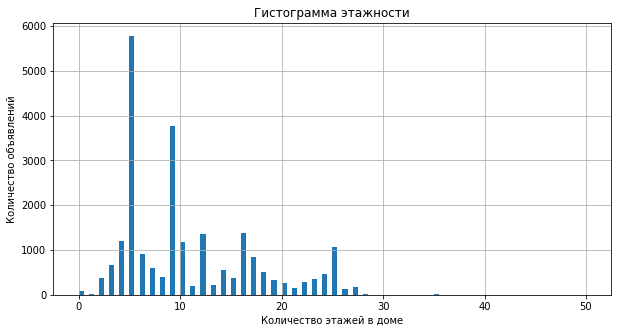

In [37]:
#  смотрим гистаграмму в диапозоне значений
data['floors_total'].plot(
    y='floors_total', 
    kind='hist', 
    bins=100, 
    range=(0,50),
    figsize = (10,5),
    grid=True);
plt.title('Гистограмма этажности')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений')
plt.show()

Видим самые популярные дома по количеству этажей - 5,9,12,16,25. Имеются значения 0, которые мы присвоили пустым строкам. Их количество небольшое, оставляем их в данных.

Смотрим количество пропусков дней размещения объявления до снятия

In [38]:
display(data['days_exposition'].isna().sum()) # кол-во пропусков столбца дней публикации

3180

Общее количество пропусков дней размещения объявления до снятия по годам

In [39]:
display(data.loc[data['first_day_exposition'].dt.year == 2014, 'days_exposition'].isna().sum())
display(data.loc[data['first_day_exposition'].dt.year == 2015, 'days_exposition'].isna().sum())
display(data.loc[data['first_day_exposition'].dt.year == 2016, 'days_exposition'].isna().sum())
display(data.loc[data['first_day_exposition'].dt.year == 2017, 'days_exposition'].isna().sum())
display(data.loc[data['first_day_exposition'].dt.year == 2018, 'days_exposition'].isna().sum())
display(data.loc[data['first_day_exposition'].dt.year == 2019, 'days_exposition'].isna().sum())

18

70

67

271

958

1796

Пропуски имеют накопительный эффект по годам. Это значит, что объявление не снято с публикации и пропуски обоснованы, имеют логическую природу. Оставляем их в датасете.

In [40]:
# изменяем тип данных на целочисленный, т.к. количество дней объявления может быть только целым числом
data['days_exposition'] = data['days_exposition'].astype('int', errors='ignore')

Пустые строки в столбце о кол-ве дней размещения объявления оставляем, это значит, что объявление еще размещено. Не повлияет на медиану и дальнейшее исследование.

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

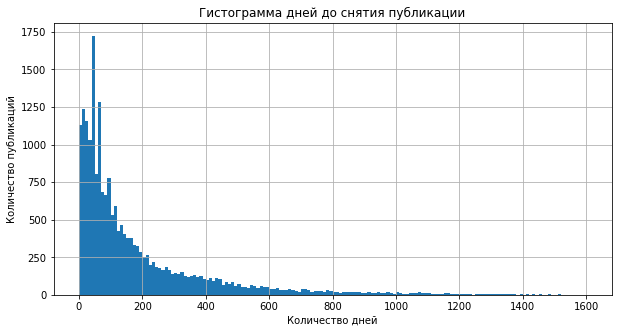

In [41]:
display(data['days_exposition'].describe())
#  смотрим гистаграмму в диапозоне значений
data['days_exposition'].sort_values().plot(
    y='days_exposition', 
    kind='hist', 
    bins=160, 
    range=(0,1600),
    figsize = (10,5),
    grid=True);
plt.title('Гистограмма дней до снятия публикации')
plt.xlabel('Количество дней')
plt.ylabel('Количество публикаций')
plt.show()

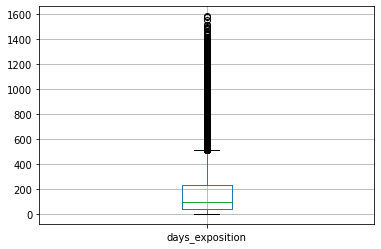

In [42]:
data.boxplot(column=['days_exposition']); # смотрим на ящик с усами

Закономерно прослеживается плавное уменьшение кол-ва объявлений на протяжении времени. Длинный хвост гистограммы и усы боксплота говорят о значительном количестве объявлений размещение которых превышает один год и достигает нескольких лет. Возможно такие объявления уже не актуальны, но снятие их не происходит (вопрос к разработчикам).

**Мы пред обработали исходные данные. Заполнили пропуски где необходимо, либо 0, либо медианой. Небольшие по численности аномальные значения оставили без изменений т.к. на дальнейшее исследование они не повлияют. Преобразовали тип данных, где это было необходимо.**

### Посчитаем и добавим в таблицу новые столбцы

 Добавляем столбец цены квадратного метра.

In [43]:
data['price_per_meter'] = data['last_price'] / data['total_area']

 Добавляем в таблицу столбцы с днем недели, месяцем (порядковый номер, наименование) и годом публикации объявления.

In [44]:
data['day_of_publication'] = data['first_day_exposition'].dt.dayofweek # день недели
data['month_of_publication'] = data['first_day_exposition'].dt.month_name() # имя месяца
data['month_of_publication_id'] = data['first_day_exposition'].dt.month # номер месяца
data['year_of_publication'] = data['first_day_exposition'].dt.year # год объявления

In [45]:
display(data['day_of_publication'].unique()) # проверяем уникальные значения
display(data['month_of_publication'].unique())
display(data['month_of_publication_id'].unique())
display(data['year_of_publication'].unique())

array([3, 1, 4, 0, 2, 6, 5])

array(['March', 'December', 'August', 'July', 'June', 'September',
       'November', 'April', 'May', 'February', 'January', 'October'],
      dtype=object)

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

array([2019, 2018, 2015, 2017, 2016, 2014])

Сформировали новые столбцы, данные корректны.

Производим категоризацию этажей. Варианты — первый, последний, другой;

In [46]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_id'] = data.apply(floor, axis=1)

In [47]:
data['floor_id'].value_counts() # проверяем

другой       17408
последний     3330
первый        2912
Name: floor_id, dtype: int64

In [48]:
# смотрим повторяющиеся значения и их количество в расстоянии до центра
display(data['citycenters_nearest'].value_counts().head(10))

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
8370.0     26
10364.0    26
4836.0     25
13056.0    23
13845.0    23
Name: citycenters_nearest, dtype: int64

Очевидно, что расстояние в метрах до центра повторяется для каждого населенного пункта и является одинаковым. Можем проверить эту гипотезу при необходимости.
Для удобства переводим метры в километры.

In [49]:
# предполагаю, что пропущенные значения о расстоянии до центра, являются центром города. Присваиваем 0
data['citycenters_nearest'] = data['citycenters_nearest'].fillna(0)
# переводим метры до центра города в километры.
data.loc[data['citycenters_nearest'] > 0, 'citycenters_nearest'] = data.loc[data['citycenters_nearest'] > 0,'citycenters_nearest'] / 1000

In [50]:
# проверяем по средней и крайним значениям
data['citycenters_nearest'].describe()

count    23650.000000
mean        10.889429
std          9.635531
min          0.000000
25%          2.242000
50%         11.250000
75%         15.247000
max         65.968000
Name: citycenters_nearest, dtype: float64

In [51]:
display(data['citycenters_nearest'].value_counts().head(10))

0.000     5511
8.460       61
20.802      32
10.720      30
8.434       27
20.444      27
10.364      26
8.370       26
4.836       25
13.056      23
Name: citycenters_nearest, dtype: int64

In [52]:
# Округляем до целых значений  путем изменения типа данных на int и сохраняем в новом столбце.
data['citycenters_nearest_km'] = data['citycenters_nearest'].astype(int)

In [53]:
# проверяем значения
display(data['citycenters_nearest_km'].value_counts().head(10))

0     5597
12    1515
14    1512
11    1415
13    1402
15    1373
16    1106
10     912
4      907
5      769
Name: citycenters_nearest_km, dtype: int64

Соотношение жилой и общей площади, а также отношение площади кухни к общей были добавлены на этапе заполнения пропусков. Колонки называются living_rate и kitchen_rate соответственно.

**Были сформированы новые столбцы со следующими данными:
цена одного квадратного метра;
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «первый», «последний», «другой»);
расстояние до центра города в километрах.**

### Проведем исследовательский анализ данных

#### Изучаем гистограммы для каждого значимого параметра.

##### Цена на момент снятия с публикации.

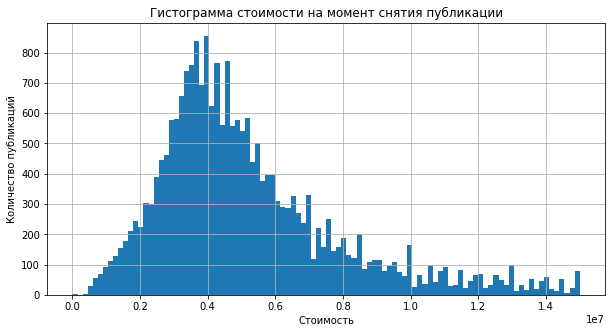

'цена'

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [54]:
data['last_price'].plot(
    y='days_exposition', 
    kind='hist', 
    bins=100, 
    range=(0,15000000),
    figsize = (10,5),
    grid=True);
plt.title('Гистограмма стоимости на момент снятия публикации')
plt.xlabel('Стоимость')
plt.ylabel('Количество публикаций')
plt.show()
display('цена',
        data['last_price'].describe())

Самая популярная стоимость квартир на момент снятия публикации около 4 млн.р. Далее по мере роста стоимости кол-во публикаций уменьшается. Наблюдаем некоторые пики которые свидетельствуют о частоте определенной цены, обычно круглой "красивой" цифры (7,10,13,15 млн.р.)

В целом данные распределены равномерно и логично.

##### Общая площадь

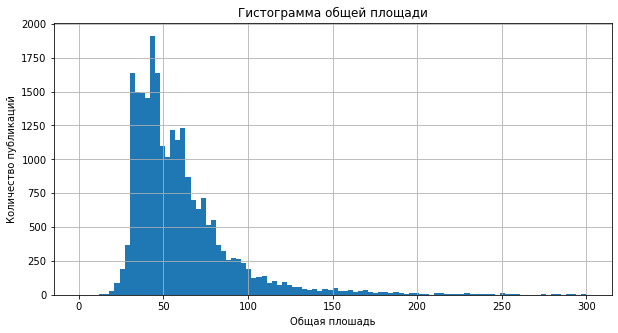

'общая площадь'

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

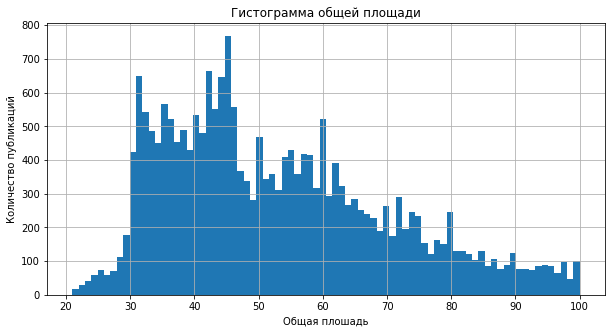

In [55]:
# Общая площадь
data['total_area'].plot(
    y='total_area', 
    kind='hist', 
    bins=100, 
    range=(0,300),
    figsize = (10,5),
    grid=True)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая плошадь')
plt.ylabel('Количество публикаций')
plt.show() 

display('общая площадь', # показатели
        data['total_area'].describe())

# построим гистаграмму диапазона, где больше всего объявлений
data['total_area'].plot(
    y='total_area', 
    kind='hist', 
    bins=80, 
    range=(21,100),
    figsize = (10,5),
    grid=True)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая плошадь')
plt.ylabel('Количество публикаций')
plt.show()

Самые частые площади квартир в объявлениях в диапазоне 31-60 кв.м. Далее почти равномерно с увеличением площади, уменьшается кол-во публикаций. Минимальное значение 12 кв.м. определяет комнату и таких объявлений не много. Максимальные значения 900 кв.м. возможно связаны с размещением в одной публикации нескольких смежных помещений с указанием их совместной площади.

Построим матрицу рассеяния для очевидно взаимосвязанных нескольких столбцов с данными о площадях (общей, жилой, кухни) и кол-ве комнат.

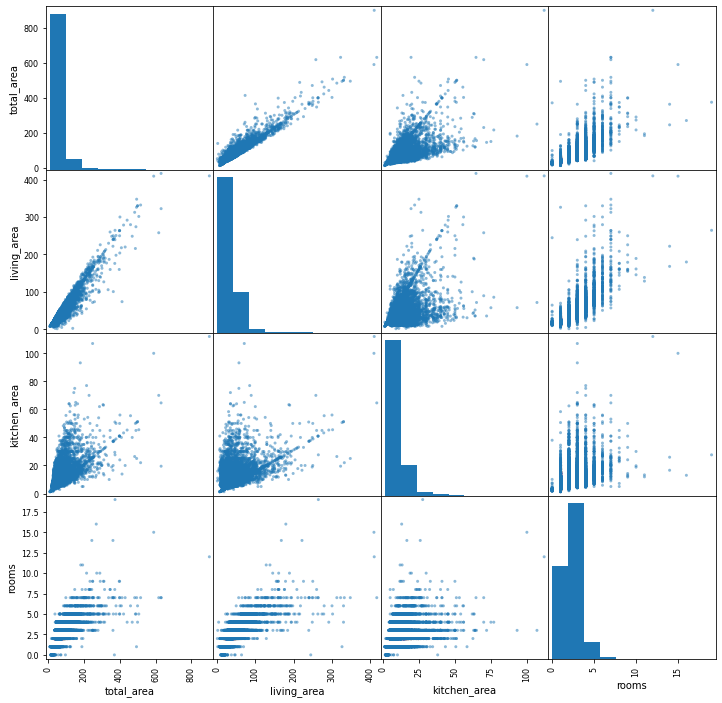

In [56]:
pd.plotting.scatter_matrix(
    data[['total_area', 'living_area', 'kitchen_area','rooms']], figsize=(12, 12));

Наблюдается большая корреляция между общей площадью и жилой. Это связано с тем, что большая часть общей площади состоит из жилой незначительная из вспомогательной. А вот корреляция общей и жилой площади с кухонной не так очевидна, т.к. независимо от кол-ва комнат в квартире размеры кухни расположены в меньшем диапазоне площади. Так же очевидно, что количество комнат способствует увеличению жилой площади, размеры же кухни не сильно увеличиваются от количества комнат. Видны аномальные значения, которые не влияют на общую тенденцию.

##### Количество комнат

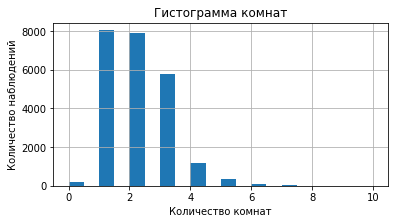

'Количество комнат'

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [57]:
# Количество комнат
data['rooms'].plot(
    y='rooms', 
    kind='hist', 
    bins=20, 
    range=(0,10),
    figsize = (6,3),
    grid=True)
plt.title('Гистограмма комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество наблюдений')
plt.show()

display('Количество комнат',
        data['rooms'].describe())


Большее количество объявлений – это квартиры с 1 или 2 комнатами. Квартир с 7 комнатами как и ожидалось меньше всех.

##### Высота потолков

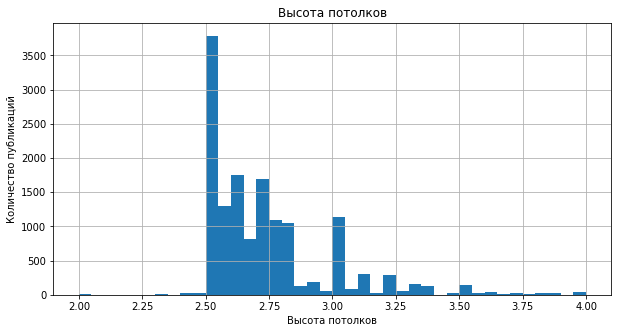

'Высота потолков'

count    14490.000000
mean         2.720376
std          0.257324
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

In [58]:
# Высота потолков
data['ceiling_height'].plot(
    y='ceiling_height', 
    kind='hist', 
    bins=40, 
    range=(2,4),
    figsize = (10,5),
    grid=True)
plt.title('Высота потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество публикаций')
plt.show() 

display('Высота потолков',
        data['ceiling_height'].describe())

Самая частая высотка полотков 2,50 м., это стандартная высота для квартир. Квартиры с высотой 3,0 м. и выше возможно являются апартаментами. Данные нормальные и представляют собой понятную картину относительно высоты потолков.

##### Этаж

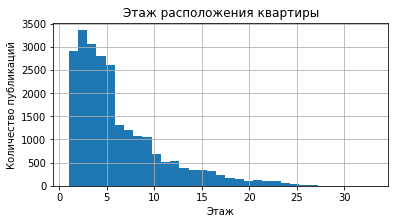

'Этаж'

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [59]:
# Этаж
data['floor'].sort_values().plot(
    y='floor', 
    kind='hist', 
    bins=33, 
    range=(1,33),
    figsize = (6,3),
    grid=True)
plt.title('Этаж расположения квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество публикаций')
plt.show()  

display('Этаж',
        data['floor'].describe())

Самые популярные квартиры на продажу расположены с 1 по 5 этажи. Скорее всего это связано с большим жилым фондом домов с этажностью до 5 в городе. В чем мы убедимся далее.

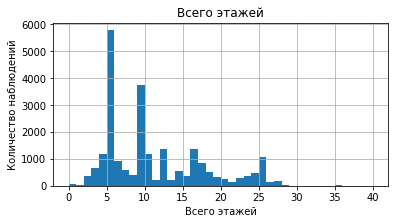

'Всего этажей'

count    23650.000000
mean        10.637505
std          6.613891
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [60]:
# Всего этажей
data['floors_total'].sort_values().plot(
    y='floors_total', 
    kind='hist', 
    bins=40, 
    range=(0,40),
    figsize = (6,3),
    grid=True)
plt.title('Всего этажей')
plt.xlabel('Всего этажей')
plt.ylabel('Количество наблюдений')
plt.show()  

display('Всего этажей',
        data['floors_total'].describe())

Большая часть квартир расположены в домах со стандартной этажностью, что связано с типовым строительством, в том числе в советское время. Мы могли бы проверить данную гипотезу, но в датафрейме нет данных о годе строительства дома. Самые многочисленные дома представлены этажностью 5,9,12,16,25. Действительно самые популярные квартиры в домах высотой 5 этажей.

Снова мы предполагаем, что возможно дома с данной этажностью имеют большой текущий срок эксплуатации, следовательно, их чаще выставляют на продажу, например с целью обмена. При наличии доп. данных от продавца, например о предпочтительном типе сделки (обмен, продажа), годе строительства дома и соотношением данных домов с общим жилым фондом Санкт-Петербурга мы могли просмотреть взаимосвязь этих параметров. Если действительно квартиры в домах с 5 этажами выставляются на продажу в связи со сроком службы дома, то возможно мы можем увидеть корреляцию таких квартир с ценой.

In [61]:
# смотрим соотношение типа этажа квартиры («первый», «последний», «другой»);
display(data['floor_id'].value_counts())

другой       17408
последний     3330
первый        2912
Name: floor_id, dtype: int64

Так как значительная часть квартир расположена в домах из 5 этажей то очевидно, что тип этажа «первый», «последний» составляют почти треть от всех остальных этажей.

##### Расстояние до центра

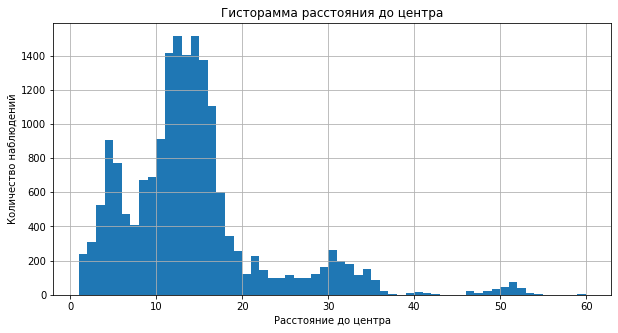

'Расстояние до центра'

count    23650.000000
mean        10.508710
std          9.508139
min          0.000000
25%          2.000000
50%         11.000000
75%         15.000000
max         65.000000
Name: citycenters_nearest_km, dtype: float64

In [62]:
# Расстояние до центра
data['citycenters_nearest_km'].plot(
    y='citycenters_nearest_km', 
    kind='hist', 
    bins=59, 
    range=(1,60),
    figsize = (10,5),
    grid=True)
plt.title('Гисторамма расстояния до центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Количество наблюдений')
plt.show()  

display('Расстояние до центра',
        data['citycenters_nearest_km'].describe())

Больше всего объявлений о продаже квартир тех, которые расположены в 11-16 км. от центра. Так же имеется пик на 4 км. и малое сгушение в районе 30 км.

##### Расстояние до аэропорта

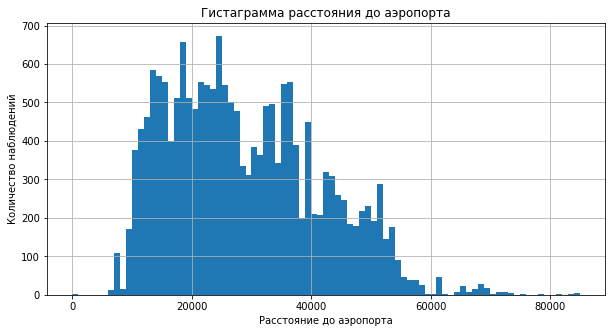

'Расстояние до аэропорта'

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [86]:
# Расстояние до аэропорта
data['airports_nearest'].plot(
    y='airports_nearest',
    kind='hist', 
    bins=85, 
    range=(0,85000),
    figsize = (10,5),
    grid=True)
plt.title('Гистаграмма расстояния до аэропорта')
plt.xlabel('Расстояние до аэропорта')
plt.ylabel('Количество наблюдений')
plt.show()  

display('Расстояние до аэропорта',
        data['airports_nearest'].describe())

Чаще всего квартиры в объявлениях расположены в диапазоне 10-55 км., с равномерным уменьшением при увеличении расстояния и наличием нескольких пиков (33,34,37,38,40 км-ы). Данный параметр так же зависит от плотности застройки, районов, общей формы(фигуры) населенного пункта (вытянутый, прямоугольный, изогнутый). Можем утверждать, что доступность аэропорта удобна для почти всех жителей Санкт-Петербурга.

##### Расстояние до парка

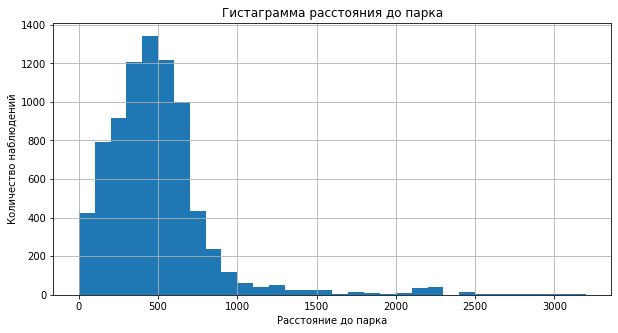

'Расстояние до парка'

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [64]:
# Расстояние до парка
data['parks_nearest'].plot(
    y='parks_nearest', 
    kind='hist', 
    bins=32, 
    range=(0,3200),
    figsize = (10,5),
    grid=True)
plt.title('Гистаграмма расстояния до парка')
plt.xlabel('Расстояние до парка')
plt.ylabel('Количество наблюдений')
plt.show()  

display('Расстояние до парка',
        data['parks_nearest'].describe())

Парки для почти всех опубликованных квартир расположены в пеший доступности и редко превышают третий квартиль или 600 м. Распределение нормальное, пик в районе медианы, раной 454,5 м.

##### День публикации

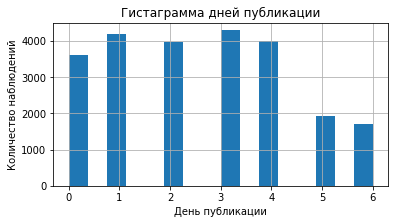

In [65]:
# День публикации
data['day_of_publication'].plot(
    y='day_of_publication', 
    kind='hist', 
    bins=16, 
    range=(0,6),
    figsize = (6,3),
    grid=True)
plt.title('Гистаграмма дней публикации')
plt.xlabel('День публикации')
plt.ylabel('Количество наблюдений')
plt.show()  

Количество объявлений размещенных в каждый будний день в два раза больше чем в каждый  выходной.

##### Месяц и год публикации

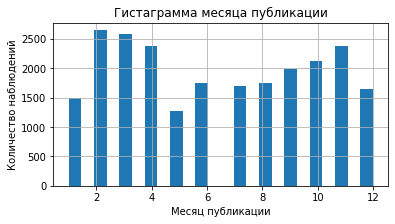

In [66]:
# Месяц публикации
data['month_of_publication_id'].plot(
    y='month_of_publication_id', 
    kind='hist', 
    bins=24, 
    range=(1,12),
    figsize = (6,3),
    grid=True)
plt.title('Гистограмма месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Количество наблюдений')
plt.show()   

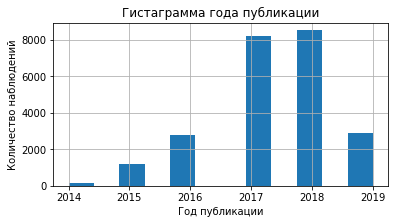

In [67]:
# Кол-во объявлений по годам
data['year_of_publication'].plot(
    y='year_of_publication', 
    kind='hist', 
    bins=12, 
    figsize = (6,3),
    grid=True)
plt.title('Гистограмма года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Количество наблюдений')
plt.show() 

Выводы и гипотезы относительно разных периодов размещения (день, месяц, год) мы делаем далее по исследованию.

#### Как быстро продавались квартиры?

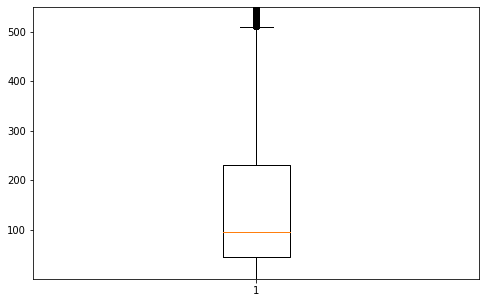

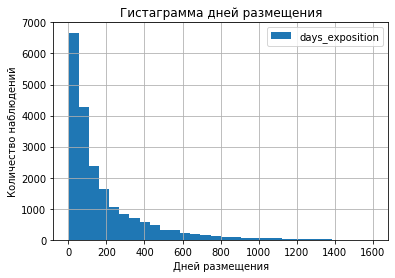

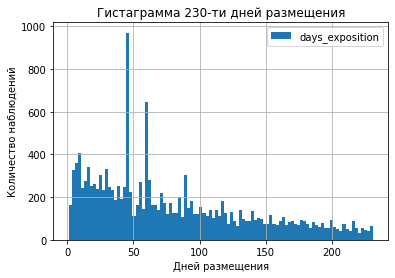

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

'медиана'

95.0

'аномальные значения'

45.0    879
60.0    538
7.0     234
30.0    208
90.0    203
Name: days_exposition, dtype: int64

In [68]:
# строим ящик с усами исключая исключая нулевые значения.
plt.figure(figsize =(8, 5))
plt.ylim(1,550) 
plt.boxplot(data[data['days_exposition']>0]['days_exposition'])

# смотрим общую гистограмму по кол-ву дней размещения объявления
data.plot (y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
plt.title('Гистограмма дней размещения')
plt.xlabel('Дней размещения')
plt.ylabel('Количество наблюдений')
plt.show() 
# смотрим подробную гистограмму до 230 дней размещения объявления
data.plot (y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,231))
plt.title('Гистограмма 230-ти дней размещения')
plt.xlabel('Дней размещения')
plt.ylabel('Количество наблюдений')
plt.show() 
# среднее значение(mean) выводим методом describe
display(data[data['days_exposition']!=0]['days_exposition'].describe())
# выводим отдельно медиану
display('медиана',
 data[data['days_exposition']!=0]['days_exposition'].median()) 
# аномально популярные значения дней
display('аномальные значения',
data[data['days_exposition']!=0]['days_exposition'].value_counts().head()) #выбивающиеся значения

Определено среднее кол-во дней продажи (180 дней или половина года) и медиана (95 дней).
На данных графиках видно, что распределение равномерное, с редкими выбросами.  Выявлены аномалии находящиеся на 7, 30, 45, 60, 90 днях. Это связано с тем, что сроки публикации объявлений на яндексе соответствуют этим дням, в зависимости от типа недвижимости.
На boxplot видим, что основные продажи находятся в диапазоне от 45 до 231 дня, выбросы находятся на отметке 500 дней, за пределами (Q3).

Определим быстрые продажи на уровне первого квартиля, они будут равны 45 дням (все что быстрее, необычно быстрая продажа). Необычно долгие продажи находятся в размахе «усов» третьего квартиля, в районе 500 дней.

#### Факторы больше всего влияющие на общую (полную) стоимость объекта

Изучаем заивсимость цены от площади

In [69]:
# создаем сводную таблицу цены и площади со столбцами 'Средняя', 'Количество', 'Медиана'.
pivot_table_area = data.pivot_table(  
    index =  'total_area' , 
    values =  'last_price' , 
    aggfunc = [ 'mean' ,  'count' ,  'median' ])
pivot_table_area.columns = ['Средняя', 'Количество', 'Медиана']
display(pivot_table_area)

,Средняя,Количество,Медиана
total_area,,,
12.0,2400000.0,1,2400000.0
13.0,2350000.0,3,1850000.0
13.2,1686000.0,1,1686000.0
14.0,1190000.0,1,1190000.0
15.0,1725000.0,2,1725000.0
...,...,...,...
590.0,65000000.0,1,65000000.0
618.0,300000000.0,1,300000000.0
631.0,140000000.0,1,140000000.0


,Средняя,Количество,Медиана
total_area,,,
172.0,3.544286e+07,7,37000000.0
180.0,3.411667e+07,6,29000000.0
158.0,2.986742e+07,7,26477136.0
160.0,2.824242e+07,16,25738400.0
190.0,6.986542e+07,9,24800000.0
...,...,...,...
23.0,2.427632e+06,19,2400000.0
28.3,2.700667e+06,6,2275000.0
28.7,2.275000e+06,6,2225000.0


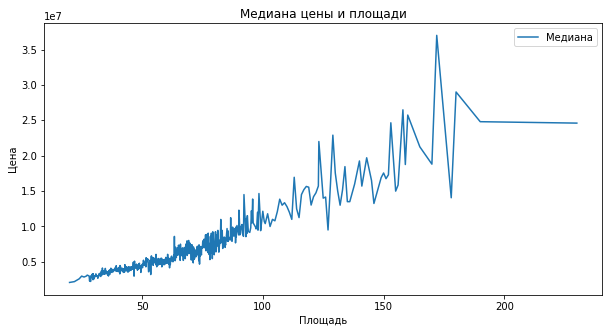

In [70]:
# Фильтруем по повторяющимся площадям квартир. Таким образом отрежем выбросы и сократим кол-во строк.
# общая тенденция изменения медианы не поменяется и график станет более удобен визуально.
display(
    pivot_table_area.query('Количество > 5').sort_values( 'Медиана' , ascending= False ))
pivot_table_area.query(
 'Количество > 5').plot( y = 'Медиана', figsize = (10, 5))
plt.title('Медиана цены и площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show();

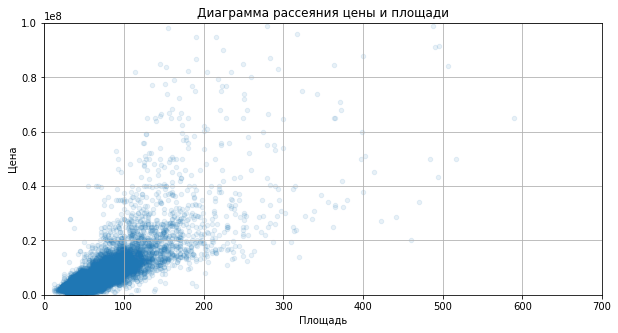

In [71]:
# построим диаграмму рассеяния для более информативного графика цены и площади
data.plot(x='total_area', 
          y='last_price', 
          kind='scatter',
          alpha= 0.1,
          ylim = ( 0 ,100000000),
          xlim = ( 0 ,700),
          grid= True,
          figsize=(10, 5));
plt.title('Диаграмма рассеяния цены и площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show() 

In [72]:
# корреляция цены от площади
display(data['total_area'].corr(data['last_price']))

0.6537428966335395

Коэффициент Пирсона равен 0.65, что говорит о достаточно высокой корреляции между площадью и ценой.
Так же на графиках видна зависисмость между стоимостью и площадью помещения. Чем больше площадь помещения, тем выше цена. Конечно имеются и выпадающие значения из тенденции, например помещения более 200 кв.м. не имеют такую очевидную корреляцию с ценой.

#### Изучаем зависимость цены от жилой площади и кухни.

0.48445530110914736

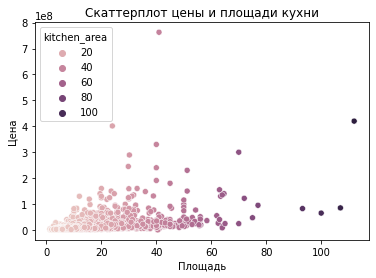

In [73]:
# скаттерплот цены и площади кухни
sns.scatterplot(data['kitchen_area'], data['last_price'], hue=data['kitchen_area'])
# корреляция
display(data['kitchen_area'].corr(data['last_price']))
plt.title('Скаттерплот цены и площади кухни')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show() 

0.5902755945176293

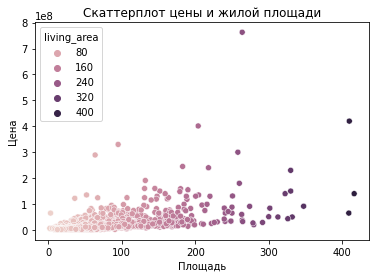

In [74]:
# диаграмма рассеяния цены и жилой площади
sns.scatterplot(data['living_area'], data['last_price'], hue=data['living_area'])
# корреляция
display(data['living_area'].corr(data['last_price']))
plt.title('Скаттерплот цены и жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show() 

Наблюдаем чуть меньшую зависимость цены от площади кухни, чем жилой. Предполагаю, тем не менее корреляция остаться значительной между ценой и площадями кухни(0,48) и жилой площади (0,59). Так же ранее мы уже изучали взаимосвязь общей площади, жилой и кухни строя матрицу рассеивания.

#### Изучаем зависимость цены от количества комнат.

,Количество,Медиана
rooms,,
0,197,2700000.0
1,8036,3600000.0
2,7924,4770169.0
3,5797,6200000.0
4,1175,9000000.0
5,326,14000000.0
6,105,19000000.0
7,59,24900000.0
8,12,23095000.0


,Количество,Медиана
rooms,,
7,59,24900000.0
9,8,23750000.0
8,12,23095000.0
6,105,19000000.0
5,326,14000000.0
4,1175,9000000.0
3,5797,6200000.0
2,7924,4770169.0
1,8036,3600000.0


'Корреляция'

0.36342062218770704

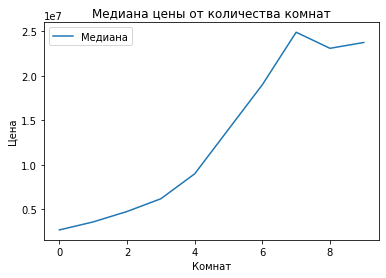

In [75]:
# создаем сводную таблицу цены и площади со столбцами 'Количество', 'Медиана'.
pivot_table_rooms = data.pivot_table(  
    index =  'rooms' , 
    values =  'last_price', 
    aggfunc = [ 'count' ,  'median' ])
pivot_table_rooms.columns = ['Количество', 'Медиана']
display(pivot_table_rooms)
# Отфильтруем группировку от аномальных значений и отсортируем по медиане.
display(pivot_table_rooms.query('Количество > 3').sort_values( 'Медиана' , ascending =  False ))
# корреляция
display('Корреляция', data['rooms'].corr(data['last_price']))
# Смотрим график
pivot_table_rooms.query(
 'Количество > 7').plot( y = 'Медиана');
plt.title('Медиана цены от количества комнат')
plt.xlabel('Комнат')
plt.ylabel('Цена')
plt.show() 

Несмотря на то, что Коэффициент Пирсона небольшой и составляет 0,36, наблюдаем очевидную взаимосвязь от количества комнат и стоимости помещения. Чем больше комнат, тем выше стоимость помещения. Когда в квартире более 6-ти комнат, они их количество уже не влияет на стоимость.

#### Изучаем зависимость цены от типа этажа (первый, последний, другой).

,Средняя,Количество,Медиана
floor_id,,,
другой,103508.033393,17408,98305.439256
первый,81989.310041,2912,81236.814346
последний,93378.957656,3330,87763.152598


'Корреляция'

0.12914302409967146

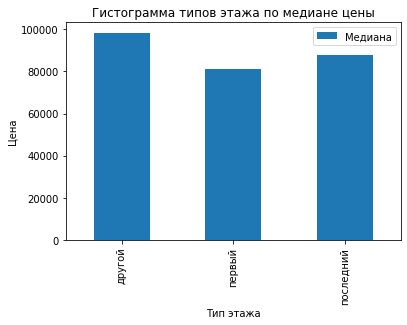

In [76]:
# группируем относительно цены за 1 кв.м.
pivot_table_floor_id = data.pivot_table(
    index = 'floor_id', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_id.columns = ['Средняя', 'Количество', 'Медиана'] # меняем наименование столбцов
pivot_table_floor_id.plot(y = 'Медиана', kind='bar') # гистаграмма

display(pivot_table_floor_id)
display('Корреляция', data['floor'].corr(data['price_per_meter']))#корреляция этажа и стоимости 1кв.м.

plt.title('Гистограмма типов этажа по медиане цены')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show() 

Корреляция между этажом и ценой существует, но небольшая, это отражает коэффициент Пирсона, который равен 0,12. Первый этаж является самым дешевым. Последние этажи дороже первых, но не намного. Самыми дорогими по стоимости являются этажи между первым и последним.

#### Изучаем зависимость цены от дня размещения объявления.

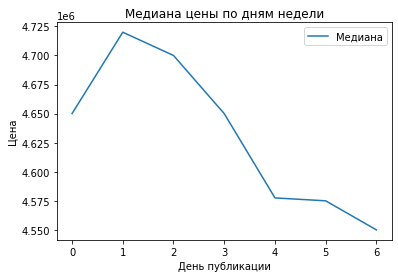

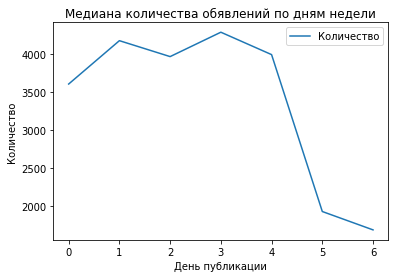

,Количество,Медиана
day_of_publication,,
0,3606,4650000.0
1,4175,4720000.0
2,3966,4700000.0
3,4286,4650000.0
4,3992,4577500.0
5,1933,4575000.0
6,1692,4550000.0


'Корреляция'

0.0016068614793023977

In [77]:
# uруппируем относительно дня недели
pivot_table_day = data.pivot_table(
    index = 'day_of_publication', values = 'last_price', aggfunc = [ 'count', 'median'])
pivot_table_day.columns = ['Количество', 'Медиана'] # меняем наименование столбцов
pivot_table_day.plot(y = 'Медиана') # график
plt.title('Медиана цены по дням недели')
plt.xlabel('День публикации')
plt.ylabel('Цена')
plt.show() 
pivot_table_day.plot(y = 'Количество') # график
plt.title('Медиана количества обявлений по дням недели')
plt.xlabel('День публикации')
plt.ylabel('Количество')
plt.show() 
display(pivot_table_day)
display('Корреляция', data['day_of_publication'].corr(data['last_price'])) #корреляция

Наблюдается немного заниженная стоимость помещений размещенных в пятницу, субботу, воскресенье. Вместе с тем объявления в субботу и воскресенье размещают более чем в 2 раза реже чем в другие дни недели. Активность размещений объявлений падает в выходные дни, как и цена объектов.

#### Изучаем зависимость цены от месяца размещения объявления.

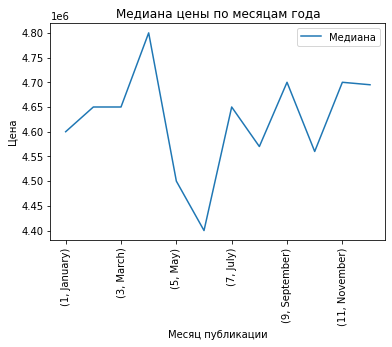

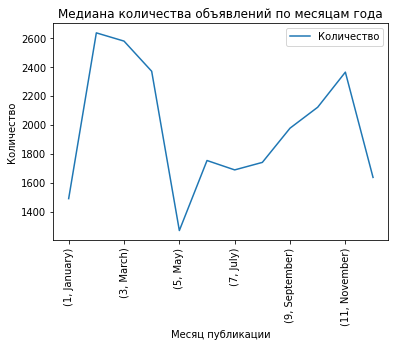

,,Средняя,Количество,Медиана
month_of_publication_id,month_of_publication,,,
1,January,6.666975e+06,1491,4600000.0
2,February,6.464463e+06,2639,4650000.0
3,March,6.362919e+06,2582,4650000.0
4,April,6.742671e+06,2373,4800000.0
5,May,6.594777e+06,1270,4500000.0
6,June,6.311184e+06,1755,4400000.0
7,July,6.641336e+06,1690,4650000.0
8,August,6.352839e+06,1742,4570000.0
9,September,6.828471e+06,1979,4700000.0


'Корреляция'

0.00274102941992422

In [78]:
# группируем относительно месяца
pivot_table_month = data.pivot_table( 
    index = ['month_of_publication_id','month_of_publication'], values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month.columns = ['Средняя', 'Количество', 'Медиана'] # меняем наименование столбцов
pivot_table_month.plot(y = 'Медиана', rot=90)
plt.title('Медиана цены по месяцам года')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена')
plt.show()
pivot_table_month.plot(y = 'Количество', rot=90)
plt.title('Медиана количества объявлений по месяцам года')
plt.xlabel('Месяц публикации')
plt.ylabel('Количество')
plt.show()

display(pivot_table_month)
display('Корреляция', data['month_of_publication_id'].corr(data['last_price'])) #корреляция

Видим понижение активности рынка недвижимости и, следовательно, меньшее количество объявлений в летние месяцы, а так же рост весной и осенью. Это свидетельствует о низкой активности рынка недвижимости летом, самая низкая цена в июне. Очевидно летом сезон отпусков и отдыха, серьезные покупки в это время года не планируют.

#### Изучаем заивисимость цены от года размещения обявления.

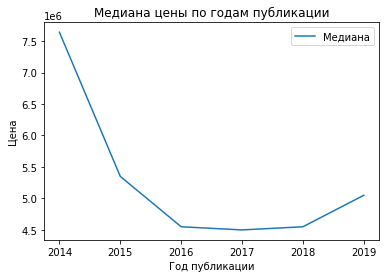

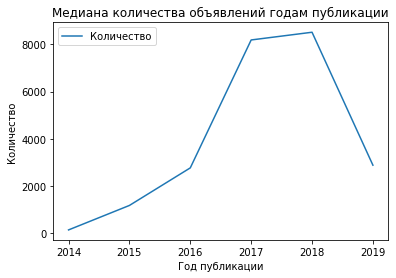

,Количество,Медиана
year_of_publication,,
2014,136,7640000.0
2015,1173,5350000.0
2016,2765,4550000.0
2017,8185,4500000.0
2018,8512,4550000.0
2019,2879,5050000.0


'Корреляция'

-0.042927051076831486

In [79]:
# группируем относительно года
pivot_table_year = data.pivot_table( 
    index = 'year_of_publication', values = 'last_price', aggfunc = ['count', 'median'])
pivot_table_year.columns = ['Количество', 'Медиана'] # меняем наименование столбцов
pivot_table_year.plot(y = 'Медиана')
plt.title('Медиана цены по годам публикации')
plt.xlabel('Год публикации')
plt.ylabel('Цена')
plt.show()
pivot_table_year.plot(y = 'Количество')
plt.title('Медиана количества объявлений годам публикации')
plt.xlabel('Год публикации')
plt.ylabel('Количество')
plt.show()

display(pivot_table_year)
display('Корреляция', data['year_of_publication'].corr(data['last_price'])) #Корреляция


2014 год выделяется малым количеством объявлений. Посмотрим весь ли период года имеется в датасете.

In [80]:
# группируем по году и месяцу
pivot_table_year_month = data.pivot_table(  
    index = ['year_of_publication','month_of_publication_id'],
    values = 'last_price', aggfunc = ['count'])
display(pivot_table_year_month.head()) # начало группировки
display(pivot_table_year_month.tail()) # конец группировки

count
                                            last_price
year_of_publication month_of_publication_id           
2014                11                              20
                    12                             116
2015                1                               67
                    2                               62
                    3                              111

count
                                            last_price
year_of_publication month_of_publication_id           
2019                1                              426
                    2                              557
                    3                              879
                    4                              956
                    5                               61

Действительно данные за 2014, а так же 2019 годам представлены не за весь год. Видим планомерное увеличение количества объявлений из года в год согласно графика (2019 год не учитываем, т.к. не весь год в датасете). Это связано с развитием сервиса Яндекс.Недвижимость и ростом его популярности.
Согласно графиков видим, что в 2016, 2017 и 2018 году цены на квартиры были ниже, чем в 2015 и в 2019 году. Аномально высокая медиана цены 2014 года возможно связана с малой выборкой этого года или общим резким падением рынка недвижимости после. Линейная корреляция отсутствует. Можем предположить, что цена на помещения из года в год может изменяться в связи с геополитическими, макроэкономическими событиями в стране, а так же развитием городской застройки и соотношением первичного и вторичного жилья, ипотечной ставкой.

#### Цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [81]:
# группируем датасет по 10 населенным пунктам по кол-ву объявлений
top_10_city = data.groupby(
    'locality_name' ).count().sort_values(by= 'first_day_exposition' , ascending= False ).head(10)
display(top_10_city)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_rate,kitchen_rate,price_per_meter,day_of_publication,month_of_publication,month_of_publication_id,year_of_publication,floor_id,citycenters_nearest_km
locality_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,15721,15721,15721,15721,15721,10104,15721,15721,15721,15721,15721,15721,15721,15721,15636,15721,15660,7284,15660,7983,13638,14581,14342,15721,15721,15721,15721,15721,15721,15721
поселок Мурино,556,556,556,556,556,214,556,556,556,556,556,556,556,556,2,556,2,0,2,2,551,492,450,556,556,556,556,556,556,556
поселок Шушары,440,440,440,440,440,217,440,440,440,440,440,440,440,440,436,440,436,0,436,152,408,404,398,440,440,440,440,440,440,440
Всеволожск,398,398,398,398,398,272,398,398,398,398,398,398,398,398,0,398,0,0,0,0,339,371,357,398,398,398,398,398,398,398
Пушкин,369,369,369,369,369,234,369,369,369,369,369,369,369,369,369,369,369,212,369,177,307,345,338,369,369,369,369,369,369,369
Колпино,338,338,338,338,338,203,338,338,338,338,338,338,338,338,337,338,337,133,337,190,308,328,322,338,338,338,338,338,338,338
поселок Парголово,327,327,327,327,327,137,327,327,327,327,327,327,327,327,327,327,327,10,327,56,302,301,289,327,327,327,327,327,327,327
Гатчина,307,307,307,307,307,149,307,307,307,307,307,307,307,307,0,307,0,0,0,0,268,292,294,307,307,307,307,307,307,307
деревня Кудрово,299,299,299,299,299,122,299,299,299,299,299,299,299,299,0,299,0,0,0,0,299,262,231,299,299,299,299,299,299,299


,Количество
locality_name,
Санкт-Петербург,15721
поселок Мурино,556
поселок Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
поселок Парголово,327
Гатчина,307
деревня Кудрово,299


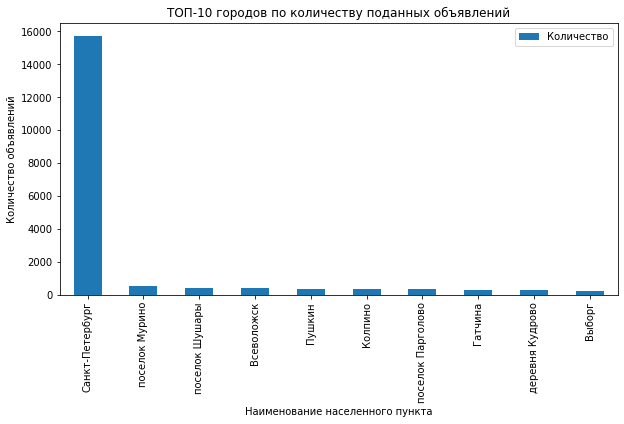

In [82]:
 # Топ 10 населенным пунктам по кол-ву объявлений
pivot_table_city = data.pivot_table(
    index = 'locality_name', 
    values = 'first_day_exposition', 
    aggfunc = ['count'])
pivot_table_city.columns = ['Количество'] 
display(pivot_table_city.sort_values(
    by='Количество',ascending=False).head(10)) 
# Строим график
pivot_table_city.sort_values(
    by='Количество',ascending=False).head(10).plot(kind='bar', y='Количество', figsize=(10,5));
plt.title('ТОП-10 городов по количеству поданных объявлений')
plt.xlabel('Наименование населенного пункта')
plt.ylabel('Количество объявлений')
plt.show()

,Средняя
locality_name,
Зеленогорск,115122.799198
Санкт-Петербург,114849.008794
поселок Репино,104238.614786
Пушкин,103125.819291
Сестрорецк,101757.616875
поселок Лисий Нос,100660.814239
Кудрово,100253.043304
деревня Мистолово,98549.976709
поселок Левашово,96997.690531


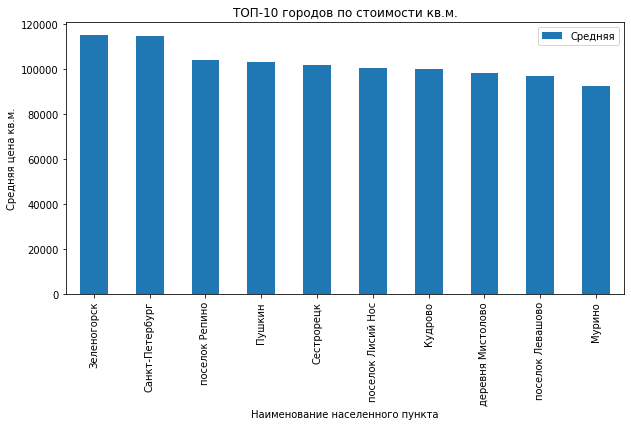

In [83]:
 # Топ 10 городов по средней стоимости квадратного меттра
pivot_table_price_per_meter = data.pivot_table(
    index = 'locality_name', 
    values = 'price_per_meter', 
    aggfunc = ['mean'])
pivot_table_price_per_meter.columns = ['Средняя']
display(pivot_table_price_per_meter.sort_values(by='Средняя',ascending=False).head(10))
# Строим график
pivot_table_price_per_meter.sort_values(
    by='Средняя',ascending=False).head(10).plot(kind='bar', y='Средняя', figsize=(10,5));
plt.title('ТОП-10 городов по стоимости кв.м.')
plt.xlabel('Наименование населенного пункта')
plt.ylabel('Средняя цена кв.м.')
plt.show()

Топ 10 по количеству публикаци и Топ 10 по стоимости отличаются. Объединим эти переменныев одну выведем итог.

In [84]:
# Объединяем две таблицы методом .join().
top_10_price_per_meter = top_10_city.join(
    pivot_table_price_per_meter)
# Перезаписываем переменную, оставляя один столбец по средней цене сортирую и изменяя тип на int.
top_10_price_per_meter = top_10_price_per_meter['Средняя'].sort_values(
    ascending=False).astype('int', errors='ignore')

display('Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений',
        top_10_price_per_meter)

'Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений'

locality_name
Санкт-Петербург      114849
Пушкин               103125
деревня Кудрово       92473
поселок Парголово     90175
поселок Мурино        85681
поселок Шушары        78677
Колпино               75424
Гатчина               68746
Всеволожск            68654
Выборг                58141
Name: Средняя, dtype: int64

Самый дорогой квадратный метр квартиры в Санкт-Петербурге составляет 114849р. Самый дешевый в десятке в Выборге, 58141р.

#### Средняя цена каждого километра от центра города

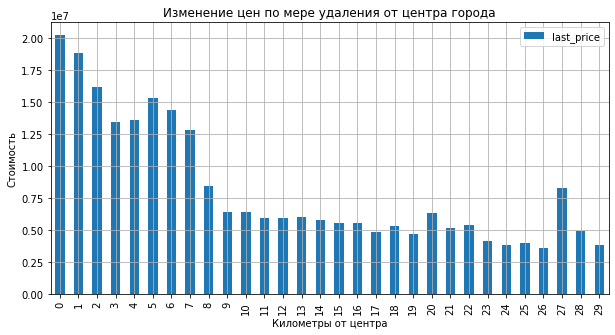

In [85]:
# группируем датасет для квартир Санкт-Петербурга по километрам от центра и цене
pivot_table_center = data.query(
    'locality_name == "Санкт-Петербург"').pivot_table(
    index = 'citycenters_nearest_km', 
    values = 'last_price', 
    aggfunc = 'mean')
pivot_table_center.plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Изменение цен по мере удаления от центра города')
plt.xlabel('Километры от центра')
plt.ylabel('Стоимость')
plt.show()

 Резкое падение стоимости помещений наблюдается на расстоянии более 7 км. от центра. Возможно это связано с транспортными развязками возле центра города и доступностью инфраструктуры, близость к историческому центру. Далее следует почти равномерный спад стоимости с пиком на 27 км.

### Общий вывод

 **Исследование было посвящено объявлениям о продажах квартир в Санкт-Петербурге.**
 
 
 
 **Изначально изучена исходная информация.**
 
Обнаружены пропуски в датасете, количество некоторых достигало 88%. Количество столбцов с пропусками 14 (всего в датасете 22 столбца). Обработаны неявные дубликаты в наименованиях населенных пунктов. Обработаны аномалии, к примеру, минимальное значение потолка 1 метр, а максимальное 100 метров; макс-е количество комнат 19. Пропуски и некоторые аномалии заполнены медианными значениями, где это уместно и необходимо для анализа. Изменены типы данных. Устранены пробелы в площадях кухонь и жилой площади.
Был не верный тип данных столбца 'first_day_exposition' т.к. должен являться датой. Отсутствуют явные дубликаты.
 
**В датафрейм добавлены новые столбцы.**
 
Цена одного квадратного метра;
День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
Месяц публикации объявления;
Год публикации объявления;
Тип этажа квартиры (значения — «первый», «последний», «другой»);
Расстояние до центра города в километрах.
 
 
**Проведен исследовательский анализ следующих параметров.**

**Построили графики на самые значимые.**

Цена на момент снятия с публикации.  Самая популярная стоимость квартир на момент снятия публикации около 4 млн.р. Далее по мере роста стоимости кол-во публикаций уменьшается. Наблюдаем некоторые пики которы свидетельствуют о частоте определенной цены, обычно круглой "красивой" цифры (7,10,13,15 млн.р.)

Общая площадь. Самые частые площади квартир в объявлениях в диапазоне 31-60 кв.м. Далее почти равномерно с увеличением площади, уменьшается кол-во публикаций. Мин. Значение 12 кв.м. определяет комнату и таких объявлений не много. Максимальные значения 900 кв.м. возможно связаны с размещением в одной публикации нескольких смежных помещений с указанием их совместной площади. Наблюдается большая корреляция между общей площадью и жилой. Это связано с тем, что большая часть общей площади состоит из жилой незначительная из вспомогательной. А вот корреляция общей и жилой площади с кухонной не так очевидна, т.к. независимо от кол-ва комнат в квартире размеры кухни расположены в меньшем диапазоне площади. Так же очевидно, что количество комнат способствует увеличению жилой площади, размеры же кухни не сильно увеличиваются от количества комнат.

Количество комнат. Большее количество объявлений – это квартиры с 1 или 2 комнатами. Квартир с 7 комнатами, как и ожидалось меньше всех.

Высота потолков. Самая частая высотка полотков 2,50 м., это стандартная высота для квартир. Квартиры с высотой 3,0 м. и выше возможно являются апартаментами. Данные нормальные и представляют собой понятную картину относительно высоты потолков.

Этаж. Самые популярные квартиры на продажу расположены с 1 по 5 этажи. Скорее всего это связано с большим жилым фондом домов с этажностью до 5 в городе. Самые многочисленные дома представлены этажностью 5,9,12,16,25. Так как значительная часть квартир расположена в домах из 5 этажей то очевидно, что тип этажа «первый», «последний» составляют почти треть от всех остальных этажей.

Расстояние до центра. Больше всего объявлений о продаже квартир тех, которые расположены в 11-16 км. от центра. Так же имеется пик на 4 км. и малое сгущение в районе 30 км.

Расстояние до аэропорта. Чаще всего квартиры в объявлениях расположены в диапазоне 10-55 км., с равномерным уменьшением при увеличении расстояния и наличием нескольких пиков (33,34,37,38,40 км-ы.). Можем утверждать, что доступность аэропорта удобна для почти всех жителей Санкт-Петербурга.

Расстояние до парка. Парки для почти всех опубликованных квартир расположены в пеший доступности и редко превышают третий квартиль или 600 м. Распределение нормальное, пик в районе медианы, раной 454,5 м.

День публикации. Количество объявлений размещенных в каждый будний день в два раза больше чем в каждый выходной.


**Ответили на вопрос как быстро продавались квартиры.**
Определено среднее кол-во дней продажи (180 дней или половина года) и медиана (95 дней).
На данных графиках видно, что распределение равномерное, с редкими выбросами.  Выявлены аномалии находящиеся на 7, 30, 45, 60, 90 днях. Это связано с тем, что сроки публикации объявлений на яндексе соответствуют этим дням, в зависимости от типа недвижимости.
На boxplot видим, что основные продажи находятся в диапазоне от 45 до 231 дня, выбросы находятся на отметке 500 дней, за пределами (Q3).

Определили быстрые продажи на уровне первого квартиля, они будут равны 45 дням (все что быстрее, необычно быстрая продажа). Необычно долгие продажи находятся в размахе «усов» третьего квартиля, в районе 500 дней.

**Факторы больше всего влияющие на общую (полную) стоимость объекта.** 
Коэффициент Пирсона между площадью и ценой равен 0.65, что говорит о достаточно высокой корреляции. Так же на графиках видна зависимость между стоимостью и площадью помещения. Чем больше площадь помещения, тем выше цена. Конечно имеются и выпадающие значения из тенденции, например помещения более 200 кв.м. не имеют такую очевидную корреляцию с ценой.

**Изучили зависимость цены от жилой площади и кухни.** Наблюдаем чуть меньшую зависимость цены от площади кухни, чем жилой. Корреляция между ценой и площадями кухни(0,48) и жилой площади (0,59).

**Изучили зависимость цены от количества комнат.** Несмотря на то, что Коэффициент Пирсона небольшой и составляет 0,36, наблюдаем очевидную взаимосвязь от количества комнат и стоимости помещения. Чем больше комнат, тем выше стоимость помещения. Когда в квартире более 6-ти комнат, они уже влияют на стоимость.

**Изучили зависимость цены от типа этажа (первый, последний, другой).** Первый этаж является самым дешевым. Последние этажи дороже первых, но не намного. Самыми дорогими являются другие этажи.

**Изучили зависимость цены от дня размещения объявления.** Наблюдается немного заниженная стоимость помещений размещенных в пятницу, субботу, воскресенье. Вместе с тем объявления в субботу и воскресенье размещают более чем в 2 раза реже чем в другие дни недели. Активность размещений объявлений падает в выходные дни, как и цена объектов.

**Изучили зависимость цены от месяца размещения объявления.** Понижение активности рынка недвижимости и, следовательно, меньшее количество объявлений в летние месяцы, а так же рост весной и осенью. Это свидетельствует о низкой активности рынка недвижимости летом, самая низкая цена в июне.

**Изучили зависимость цены от года размещения объявления.** Имеется планомерное увеличение кол-ва объявлений из года в год. 2016, 2017 и 2018 году цены на квартиры были ниже, чем в 2015 и в 2019 году.


**Определена цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.** Самый дорогой квадратный метр квартиры в Санкт-Петербурге составляет 114849р. Самый дешевый в десятке в Выборге, 58141р.


**Средняя цена каждого километра от центра города описана так:**

Резкое падение стоимости помещений наблюдается на расстоянии более 7 км. от центра. Возможно это связано с транспортными развязками возле центра города и доступностью инфраструктуры, близость к историческому центру. Далее следует почти равномерный спад стоимости с пиком на 27 км.



**Итоги:**

**На цену квадратного метра квартиры больше всего влияют: общая площадь, этажность, расстояние до центра и год публикации. Наблюдается незначительное влияние на стоимость квадратного метра таких параметров как: день, месяц публикации, кол-во комнат, расстояние до парков и аэропорта. Квартиры, находящиеся в радиусе 7 км. от центра Санкт-Петербурга самые дорогие. Самые часто публикуемые квартиры 1 и 2 комнатные, расположенные не выше 5 этажа и не дальше 10 км. от центра.**
 